In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from evaluation import *
from os.path import join, exists
from os import makedirs
import pandas as pd
from matplotlib.ticker import PercentFormatter
from nested_cv import nest_k_cv
from decision_tree import DecisionTree
%matplotlib inline

# Evaluation

In [3]:
# Load datasets
CLEAN_DATA = np.loadtxt('data/clean_dataset.txt')
NOISY_DATA = np.loadtxt('data/noisy_dataset.txt')
SAVE_DATA_DIR = join('figures')
if not exists(SAVE_DATA_DIR):
    makedirs(SAVE_DATA_DIR)

# K-Fold Cross Validation

In [4]:
clean_data_res = k_fold_cv(CLEAN_DATA, DecisionTree())
noisy_data_res = k_fold_cv(NOISY_DATA, DecisionTree())

Begin 10-fold cross validation
End of 10-fold cross validation
Begin 10-fold cross validation
End of 10-fold cross validation


## Confusion Matrix

In [5]:
# Plot Confusion Matrix Function
def plot_cm_heatmap(cm: np.ndarray, **kwargs):
    """Plot Confusion Matrix Heatmap

    Args:
        cm: confusion matrix normalised

    Returns:
        Axes with confusion matric heatmap
    """
    ax = sns.heatmap(cm, annot=True, **kwargs)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Prediction")
    return ax

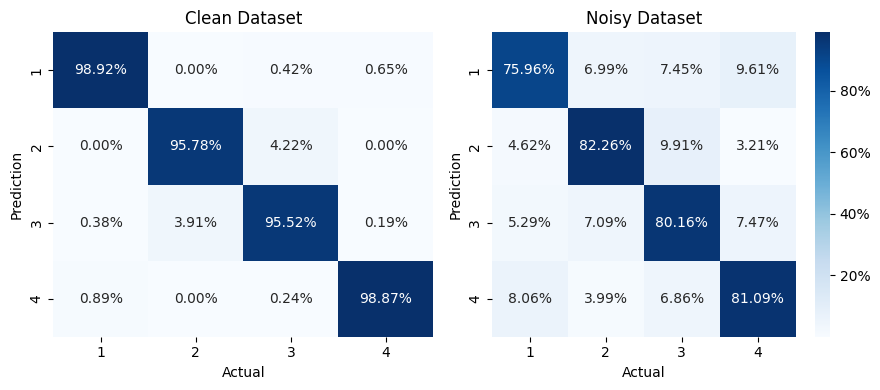

In [16]:
# Confusion Matrix
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9,4))

ax2 = plot_cm_heatmap(noisy_data_res['cm'], 
                      fmt='.2%', cmap='Blues', ax=ax2)

ax1 = plot_cm_heatmap(clean_data_res['cm'], 
                      fmt='.2%', cmap='Blues',ax=ax1, cbar_ax=ax2.collections[0].colorbar.ax)

for ax in (ax1, ax2):
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
    
ax1.set_title('Clean Dataset')
ax2.set_title('Noisy Dataset')
for ax in (ax1, ax2):
    ax.set_xticklabels(range(1,5))
    ax.set_yticklabels(range(1,5))
plt.tight_layout()
plt.savefig(join(SAVE_DATA_DIR, 'cm.eps'), dpi=600)
plt.show()

In [6]:
def get_tb_res(data, info=None):
    """Plot table with results

    Args:
        data: Table with data
        info: Info to print . Defaults to None.

    Returns:
        _description_
    """
    METRICS = ['precision', 'recall',
                    'f1', 'accuracy', 'depth']
    res_lst = dict()
    for m in METRICS:
        res_lst[m] = data[m]
    res_tb = pd.DataFrame(res_lst, index= range(1,5)).T
    res_tb['mean'] = res_tb.apply(np.mean, axis=1)
    print(info)
    return res_tb.round(3)

In [18]:
clean_res_tb = get_tb_res(clean_data_res, 'Clean Data')
clean_res_tb

Clean Data


,1,2,3,4,mean
precision,0.988,0.961,0.952,0.992,0.973
recall,0.989,0.958,0.955,0.989,0.973
f1,0.988,0.959,0.953,0.990,0.973
accuracy,0.973,0.973,0.973,0.973,0.973
depth,12.600,12.600,12.600,12.600,12.600


In [19]:
noisy_res_tb = get_tb_res(noisy_data_res, 'Noisy Data')
noisy_res_tb

Noisy Data


,1,2,3,4,mean
precision,0.803,0.816,0.771,0.805,0.799
recall,0.760,0.823,0.802,0.811,0.799
f1,0.779,0.817,0.784,0.807,0.797
accuracy,0.798,0.798,0.798,0.798,0.798
depth,19.000,19.000,19.000,19.000,19.000


## Nested Cross Validation

In [7]:
# Run Nested Cross Validation
clean_data_res = nest_k_cv(CLEAN_DATA, DecisionTree())
noisy_data_res = nest_k_cv(NOISY_DATA, DecisionTree())

Begin 10-fold nested cross validation
Begin 10-fold nested cross validation


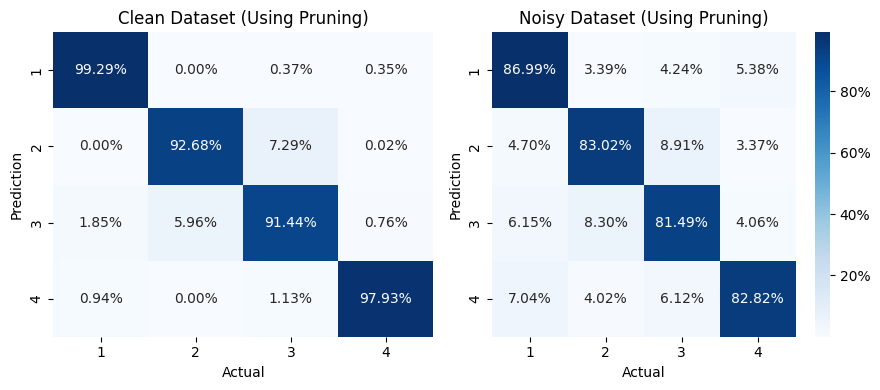

In [8]:
# Confusion Matrix
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9,4))

ax2 = plot_cm_heatmap(noisy_data_res['cm'], 
                      fmt='.2%', cmap='Blues', ax=ax2)

ax1 = plot_cm_heatmap(clean_data_res['cm'], 
                      fmt='.2%', cmap='Blues',ax=ax1, cbar_ax=ax2.collections[0].colorbar.ax)

for ax in (ax1, ax2):
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
    
ax1.set_title('Clean Dataset (Using Pruning)')
ax2.set_title('Noisy Dataset (Using Pruning)')
for ax in (ax1, ax2):
    ax.set_xticklabels(range(1,5))
    ax.set_yticklabels(range(1,5))
plt.tight_layout()
plt.savefig(join(SAVE_DATA_DIR, 'cm_nested.eps'), dpi=600)
plt.show()

In [9]:
clean_res_tb = get_tb_res(clean_data_res, 'Clean Data With Pruning')
clean_res_tb

Clean Data With Pruning


,1,2,3,4,mean
precision,0.973,0.942,0.913,0.989,0.954
recall,0.993,0.927,0.914,0.979,0.953
f1,0.983,0.933,0.913,0.984,0.953
accuracy,0.954,0.954,0.954,0.954,0.954
depth,4.667,4.667,4.667,4.667,4.667


In [10]:
noisy_res_tb = get_tb_res(noisy_data_res, 'Noisy Data With Pruning')
noisy_res_tb

Noisy Data With Pruning


,1,2,3,4,mean
precision,0.829,0.839,0.816,0.866,0.837
recall,0.870,0.830,0.815,0.828,0.836
f1,0.847,0.832,0.812,0.844,0.834
accuracy,0.835,0.835,0.835,0.835,0.835
depth,7.222,7.222,7.222,7.222,7.222
